# PyCaret

前処理，ハイパーパラメータのチューニング，推論を自動実行できるモジュール

## データセットの読み込み(ボストン住宅価格)

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split

boston = load_boston()
df_x_boston = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df_y_boston = pd.DataFrame(boston['target'], columns=['MEDV'])
df_boston = pd.concat([df_x_boston, df_y_boston], axis=1)

x_train, x_test, y_train, y_test = train_test_split(df_x_boston, df_y_boston, test_size=0.2, random_state=1)

df_train = pd.concat([x_train, y_train], axis=1)
df_test = pd.concat([x_test, y_test], axis=1)

In [2]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88


In [3]:
y_train

,MEDV
42,25.3
58,23.3
385,7.2
78,21.2
424,11.7
...,...
255,20.9
72,22.8
396,12.5
235,24.0


## PyCaret動作確認

In [4]:
from pycaret.regression import *
import shap
reg1 = setup(data=df_train, target='MEDV')

,Description,Value
0,session_id,8198
1,Target,MEDV
2,Original Data,"(404, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(282, 13)"


In [5]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.2559,11.4465,3.2563,0.8533,0.1436,0.1113,0.0960
gbr,Gradient Boosting Regressor,2.3304,11.4216,3.2658,0.8533,0.1518,0.1196,0.0130
lightgbm,Light Gradient Boosting Machine,2.4409,13.5700,3.5162,0.8334,0.1497,0.1162,0.0100
rf,Random Forest Regressor,2.4769,13.6740,3.5386,0.8295,0.1561,0.1232,0.0960
ada,AdaBoost Regressor,3.1456,17.8017,4.1245,0.7757,0.1864,0.1620,0.0150
dt,Decision Tree Regressor,3.2144,23.3842,4.6461,0.7063,0.2068,0.1658,0.0070
lr,Linear Regression,3.5689,27.8481,5.1393,0.6517,0.2428,0.1746,0.1810
ridge,Ridge Regression,3.5848,28.1926,5.1732,0.6470,0.2504,0.1762,0.0070
br,Bayesian Ridge,3.7418,29.5374,5.3180,0.6303,0.2530,0.1816,0.0070
en,Elastic Net,3.9248,31.2675,5.4762,0.6118,0.2539,0.1868,0.0060


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=8198, verbose=0, warm_start=False)

In [6]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.4748,12.5253,3.5391,0.8076,0.1404,0.1141
1,2.0830,6.8197,2.6115,0.8957,0.1746,0.1421
2,1.9050,5.6440,2.3757,0.9305,0.1522,0.1223
3,2.5125,10.5430,3.2470,0.8599,0.1528,0.1279
4,2.0562,8.6744,2.9452,0.8115,0.1564,0.1219
5,2.3681,12.4350,3.5263,0.8620,0.1874,0.1294
6,1.5648,3.4791,1.8652,0.9644,0.0917,0.0768
7,3.1426,25.8665,5.0859,0.7377,0.1576,0.1199
8,2.7880,17.3891,4.1700,0.7689,0.1794,0.1348
9,2.4092,10.8395,3.2923,0.8949,0.1257,0.1065


In [7]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.8537,12.9136,3.5935,0.8016,0.1518,0.1323
1,1.9392,6.2899,2.5080,0.9038,0.1726,0.1297
2,1.6840,6.7373,2.5956,0.9170,0.1269,0.0912
3,3.0375,13.7162,3.7035,0.8178,0.1703,0.1527
4,1.9499,6.3592,2.5218,0.8618,0.1526,0.1199
5,2.3411,12.1612,3.4873,0.8650,0.1733,0.1225
6,1.6492,5.3610,2.3154,0.9452,0.1009,0.0774
7,3.5548,32.1082,5.6664,0.6745,0.1793,0.1273
8,2.6792,12.1252,3.4821,0.8389,0.1588,0.1376
9,2.7071,17.2356,4.1516,0.8328,0.1364,0.1100


In [8]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.0425,20.7714,4.5576,0.6809,0.1635,0.1317
1,2.1012,6.8682,2.6207,0.8950,0.1782,0.1495
2,1.2852,2.7939,1.6715,0.9656,0.1027,0.0817
3,1.9706,10.4197,3.2280,0.8616,0.1375,0.0972
4,1.6490,7.3268,2.7068,0.8408,0.1353,0.0969
5,2.5164,11.8853,3.4475,0.8681,0.1769,0.1313
6,1.8793,5.5050,2.3463,0.9437,0.0999,0.0827
7,3.1737,22.1341,4.7047,0.7756,0.1472,0.1142
8,2.1209,10.7529,3.2792,0.8571,0.1435,0.1014
9,2.8205,16.0075,4.0009,0.8448,0.1517,0.1265


In [9]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.1463,25.9222,5.0914,0.6018,0.1684,0.1316
1,2.3586,8.3863,2.8959,0.8718,0.1882,0.1627
2,1.8684,6.0045,2.4504,0.9261,0.1689,0.1349
3,2.0956,9.4732,3.0778,0.8741,0.1276,0.0990
4,1.9091,9.3248,3.0537,0.7974,0.1723,0.1237
5,2.6359,12.3263,3.5109,0.8632,0.1795,0.1400
6,2.3469,9.0250,3.0042,0.9078,0.1179,0.1011
7,3.9668,40.3787,6.3544,0.5906,0.1892,0.1343
8,2.3455,12.5302,3.5398,0.8335,0.1591,0.1117
9,3.2831,32.5760,5.7075,0.6841,0.1951,0.1405


In [10]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.8658,15.8072,3.9758,0.7572,0.1477,0.1251
1,2.3546,8.8748,2.9791,0.8643,0.1912,0.1627
2,1.7539,4.9960,2.2352,0.9385,0.1359,0.1104
3,2.0329,9.8703,3.1417,0.8689,0.1338,0.0982
4,1.9416,8.5499,2.9240,0.8142,0.1502,0.1141
5,2.5535,12.3176,3.5097,0.8633,0.1769,0.1331
6,1.9879,6.0455,2.4588,0.9382,0.1020,0.0874
7,3.7701,38.6037,6.2132,0.6086,0.1915,0.1428
8,2.5668,14.2176,3.7706,0.8111,0.1794,0.1301
9,2.9419,17.4569,4.1781,0.8307,0.1524,0.1282


In [11]:
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.2419,22.8262,4.7777,0.6493,0.1690,0.1388
1,2.3923,9.2631,3.0435,0.8584,0.1910,0.1617
2,1.8745,5.5207,2.3496,0.9320,0.1449,0.1214
3,2.1936,10.4026,3.2253,0.8618,0.1321,0.1027
4,2.0786,10.1306,3.1829,0.7799,0.1681,0.1251
5,2.5079,11.8206,3.4381,0.8688,0.1765,0.1333
6,1.9669,6.3303,2.5160,0.9353,0.1028,0.0864
7,4.3062,48.4546,6.9609,0.5087,0.2142,0.1602
8,2.5284,14.6733,3.8306,0.8050,0.1763,0.1224
9,3.3147,26.2666,5.1251,0.7453,0.1739,0.1404


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


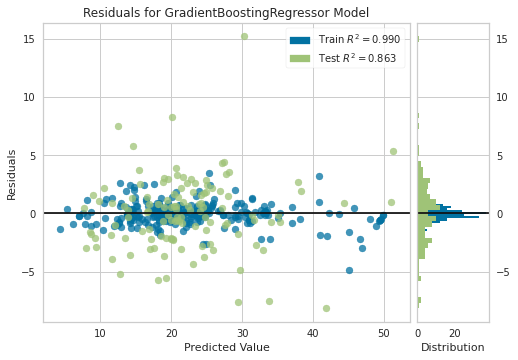

In [12]:
plot_model(tuned_gbr)

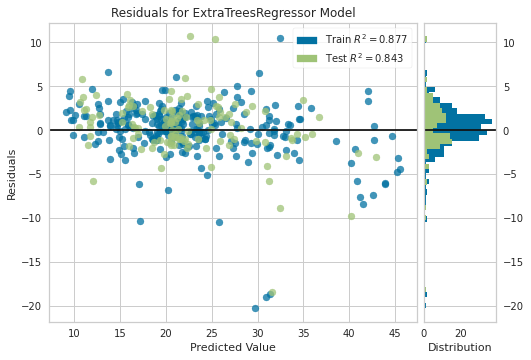

In [13]:
plot_model(tuned_et)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


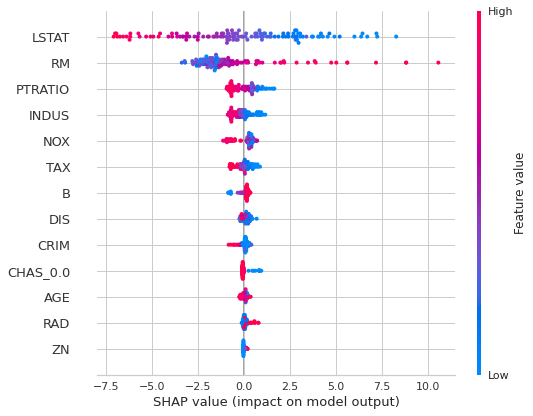

In [14]:
interpret_model(tuned_et)

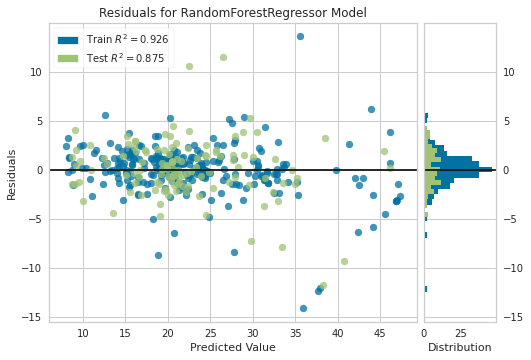

In [15]:
plot_model(tuned_rf)

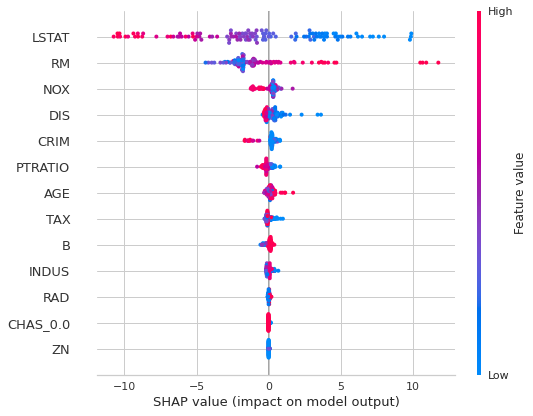

In [16]:
interpret_model(tuned_rf)

In [17]:
predictions = predict_model(tuned_gbr, data=df_test)
predictions

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Label
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53,28.2,26.386789
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18,23.9,26.773093
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,16.6,19.913071
67,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10,22.0,17.802806
362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19,20.8,21.061715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16,22.9,21.705069
224,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8,41.979452
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00,21.7,21.855972
426,12.24720,0.0,18.10,0.0,0.584,5.837,59.7,1.9976,24.0,666.0,20.2,24.65,15.69,10.2,18.001672


In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

r2 = r2_score(predictions['MEDV'], predictions['Label'])
mae = mean_absolute_error(predictions['MEDV'], predictions['Label'])

print("R2 : %.3f" % r2)
print("MAE : %.3f" % mae)

R2 : 0.887
MAE : 2.552


### データの標準化

RAWデータをそのまま入力してもあまり精度はよくなかったので，標準化してからPyCaretに渡してみる．

In [19]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
df_train_std = pd.DataFrame(sc.transform(x_train), columns=boston['feature_names'])
df_test_std = pd.DataFrame(sc.transform(x_test), columns=boston['feature_names'])

df_train_std['MEDV'] = y_train.values
df_test_std['MEDV'] = y_test.values

In [21]:
reg2 = setup(data=df_train_std, target='MEDV')

,Description,Value
0,session_id,1524
1,Target,MEDV
2,Original Data,"(404, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(282, 13)"


In [22]:
reg2_best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.2746,11.1598,3.2326,0.8700,0.1424,0.1135,0.0880
gbr,Gradient Boosting Regressor,2.3453,11.2754,3.2395,0.8615,0.1525,0.1233,0.0110
rf,Random Forest Regressor,2.4122,12.2352,3.3767,0.8562,0.1479,0.1204,0.0950
lightgbm,Light Gradient Boosting Machine,2.5186,14.1147,3.6092,0.8417,0.1532,0.1220,0.0090
ada,AdaBoost Regressor,2.9188,14.9766,3.7926,0.8173,0.1821,0.1589,0.0160
knn,K Neighbors Regressor,2.9755,20.0385,4.2918,0.7752,0.1747,0.1388,0.0170
dt,Decision Tree Regressor,3.0922,21.3466,4.4778,0.7386,0.2010,0.1523,0.0090
br,Bayesian Ridge,3.6696,28.8419,5.2112,0.6654,0.2549,0.1765,0.0060
lar,Least Angle Regression,3.7112,28.5321,5.2149,0.6646,0.2592,0.1795,0.0060
ridge,Ridge Regression,3.7092,28.8711,5.2316,0.6627,0.2588,0.1784,0.0050


In [23]:
reg2_best

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=1524, verbose=0, warm_start=False)

In [24]:
reg2_gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.2123,32.0172,5.6584,0.6419,0.2168,0.1575
1,2.0852,8.1352,2.8522,0.8952,0.1025,0.0871
2,2.5231,10.9145,3.3037,0.8958,0.1258,0.1055
3,2.2738,8.3076,2.8823,0.9350,0.1408,0.1105
4,2.2635,11.2995,3.3615,0.9177,0.1677,0.1248
5,1.9361,5.3840,2.3203,0.8667,0.1707,0.1485
6,2.4795,10.3434,3.2161,0.8885,0.1545,0.1342
7,1.9189,5.8198,2.4124,0.9321,0.1207,0.0927
8,2.4925,11.9016,3.4499,0.8324,0.1974,0.1608
9,2.2678,8.6313,2.9379,0.8095,0.1276,0.1118


In [25]:
reg2_gbr_tuned = tune_model(reg2_gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.4491,19.1971,4.3815,0.7853,0.1528,0.1099
1,2.2430,10.5178,3.2431,0.8645,0.1046,0.0881
2,2.3067,9.8471,3.1380,0.9060,0.1116,0.0898
3,2.3859,10.1682,3.1888,0.9204,0.1277,0.1062
4,2.9809,15.5557,3.9441,0.8868,0.1614,0.1421
5,1.6215,4.6332,2.1525,0.8853,0.1475,0.1185
6,2.4628,12.2197,3.4957,0.8683,0.1892,0.1476
7,1.7212,4.8672,2.2062,0.9432,0.1139,0.0858
8,2.5435,12.0215,3.4672,0.8307,0.1891,0.1540
9,1.9680,7.1878,2.6810,0.8414,0.1225,0.0977


In [26]:
from sklearn.ensemble import GradientBoostingRegressor

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

gbr = GradientBoostingRegressor()
gbr.fit(x_train_std, y_train)

pred_gbr = gbr.predict(x_test_std)
r2_gbr = r2_score(y_test, pred_gbr)
mae_gbr = mean_absolute_error(y_test, pred_gbr)

print("R2 : %.3f" % r2_gbr)
print("MAE : %.3f" % mae_gbr)

R2 : 0.919
MAE : 2.210


In [27]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor()
et.fit(x_train_std, y_train)

pred_et = et.predict(x_test_std)
r2_et = r2_score(y_test, pred_et)
mae_et = mean_absolute_error(y_test, pred_et)

print("R2 : %.3f" % r2_et)
print("MAE : %.3f" % mae_et)

R2 : 0.916
MAE : 2.149


In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train_std, y_train)

pred_rf = rf.predict(x_test_std)
r2_rf = r2_score(y_test, pred_rf)
mae_rf = mean_absolute_error(y_test, pred_rf)

print("R2 : %.3f" % r2_rf)
print("MAE : %.3f" % mae_rf)

R2 : 0.915
MAE : 2.284


R2，MAEともに，PyCaretよりもscikit-learnで学習させる方が推定精度が高い．  
アルゴリズム選定などあたりをつけるためには使いやすいが，高い精度を得るには個別にチューニングすべきかもしれない．